<a href="https://colab.research.google.com/github/hyyoka/DeepLearning-models-Implemetation-from-scratch/blob/main/Activation_Functions_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation functions: forward and backward from Scratch

1. Sigmoid: forward and backward
2. Tanh (Hyperbolic tangent): forward and backward
3. ReLu: forward and backward
4. Leaky ReLu: forward and backward

## 1. Sigmoid

함수값을 (0,1)로 제한시키는 비선형 함수.

$$y = \frac{1}{1+e^{-x}}$$
$$y' = y(1-y)$$

구체적인 derivation은 아래를 참고.


In [1]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A, Z
def sigmoid_backward(dA, Z):
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ


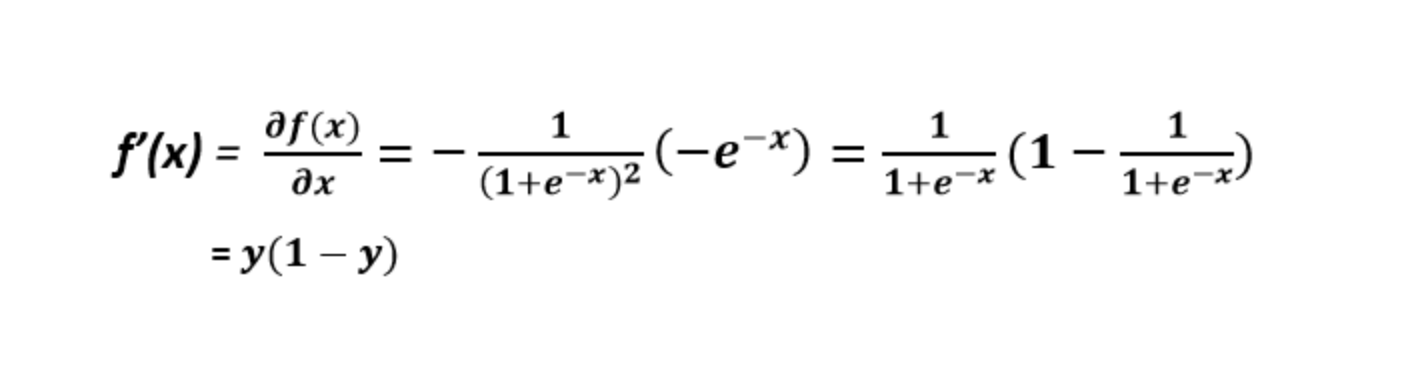

## 2. Tanh

sigmoid 함수의 중심값이 0이 아니라는 단점을 보완 -> 최적화를 빠르게

$$y = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
$$y' = 1-y^2$$

In [2]:
def tanh(Z):
    A = (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    return A, Z
def tanh_backward(dA,Z):
    t = (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    dZ = dA * (1-t**2)



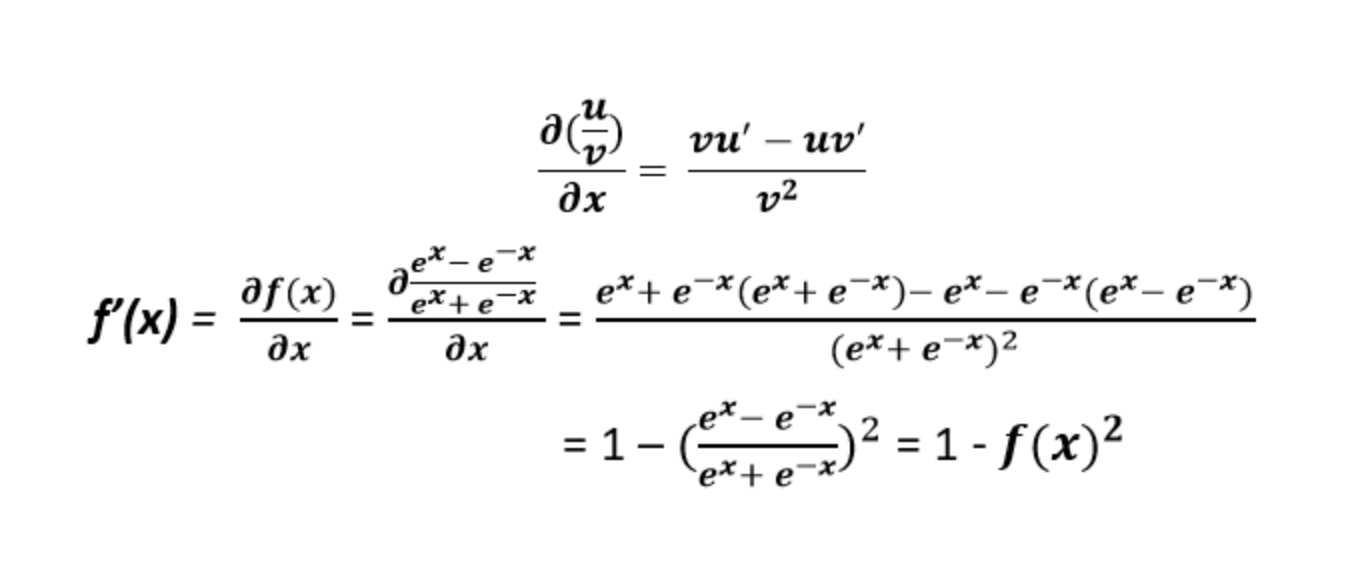

## 3. ReLu

간결한 형태의 비선형 함수. 비선형함수임에도 선형성이 두드러진다. 연산 비용이 작다. 

$$y = max(0,x)$$

In [3]:
def relu(Z):
    A = np.maximum(0,Z)
    assert (A.shape == Z.shape)
    return A, Z
def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    dZ[Z > 0] = 1
    assert (dZ.shape == Z.shape)
    return dZ


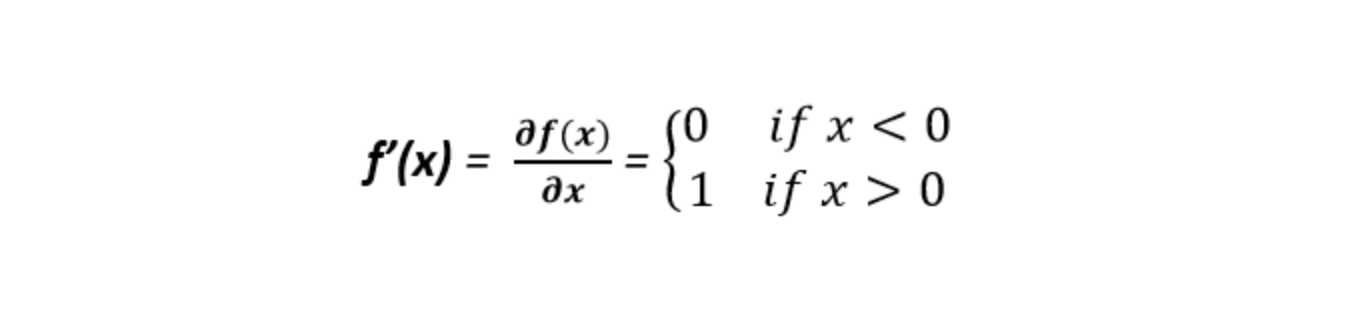

## 4. Leaky ReLu

x<0일때 기울기가 0이 되어 뉴런이 죽는 relu의 단점(dying relu)를 해결

$$y = max(0.01x,x)$$

In [ ]:
def leakyrelu(Z):
    A = np.maximum(0.1*Z,Z)
    assert (A.shape == Z.shape)
    return A, Z
def leaky_relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z > 0] = 1
    dZ[Z <= 0] = 0.001
    assert (dZ.shape == Z.shape)
    return dZ

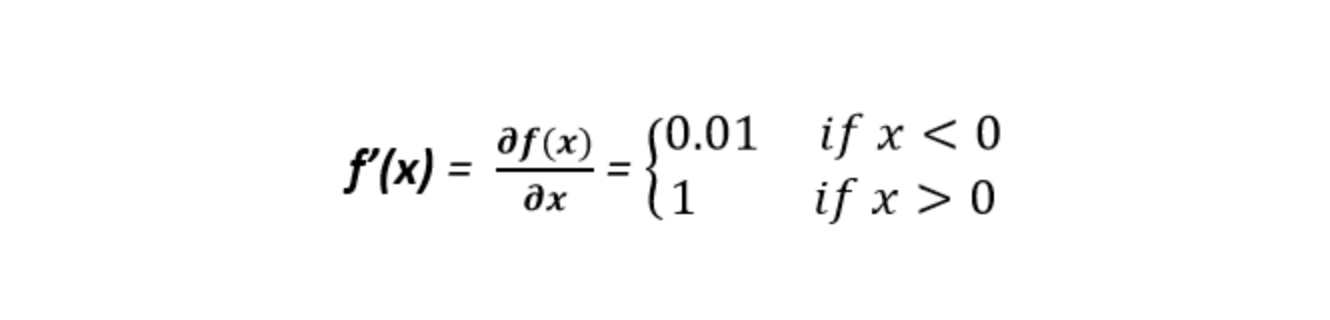